# 텍스트 마이닝 개요

+ 텍스트마이닝: 텍스트로부터 양질의 정보를 뽑아내는 과정
+ 통계적 패턴학습(회귀분석 등)을 활용
+ 자연어 처리 등의 방법 활용
+ 비구조화된 데이터를 구조화(벡터형으로 변환)
+ 변환된 벡터에 머신러닝(딥러닝)기법 적용

# 텍스트 마이닝의 단계

1. 문서
2. 토크나이즈(단어단위로 자름) & 표준화(단어를 원형으로 복원시키는 것)
3. 시퀀스 생성(리스트)
4. 문맥 정보를 포함하거나 하지 않으면서 정리. 방법론 선택

# 텍스트 마이닝 적용 분야

1. 문서 분류
2. 문서 생성
3. 키워드 추출
4. 토픽 모델링


# 텍스트 마이닝 실습 - 한국어 처리

## 1. 패키지 불러오기 & 예제파일 가져오기

### koNLPy : 5종류의 한국어 형태소 분석기 제공

>설치 참고 사이트: http://konlpy-ko.readthedocs.io/ko/v0.4.3/install/

1. JAVA 설치 https://java.com/ko/download/
2. 환경변수 JAVA_HOME 설정 https://docs.oracle.com/cd/E19182-01/820-7851/inst_cli_jdk_javahome_t/index.html
3. JPype1을 다운로드 받고 설치 https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
OS 버전과 파이썬 버전을 확인하고 자신의 환경에 맞는 파일을 다운로드
 + ex) 파이썬 버전: 3.8, 윈도우 64bit: JPype1-1.0.2-cp38-cp38-win_amd64.whl
 + Anaconda prompt에서 `pip install JPype1-1.0.2-cp38-cp38-win_amd64.whl` 명령어를 실행
4. pip로 KoNLPy 설치
 + Anaconda prompt에서 `pip install konlpy` 명령어를 실행
 
### 예제파일

+  koNLPy corpus에 내장된 대한민국헌법 텍스트 파일

In [7]:
# konlpy 패키지 불러오기
from konlpy.corpus import kolaw

# 예제파일 불러오기
c = kolaw.open('constitution.txt').read()

In [8]:
#가져온 데이터의 type을 확인
print(type(c))

# 길이 확인
print(len(c))

# ~600자 출력
print(c[:600])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


## 2. NLTK를 이용해서 tokenize해보기(koNLPy를 왜 사용해야 하는가?)

+ NLTK는 파이썬의 텍스트마이닝 패키지 중 하나
+ 영어 기준 NLP 라이브러리이기 때문에 한글 토크나이즈가 어려울 것으로 예상
+ 다음 예제를 통해 NLTK만으로는 한글 분석이 잘 안된다는 것을 알 수 있음

+ 구문을 문장 단위로 분리 - "마침표(.) + 공백"인 경우 분리

In [9]:
# 패키지 불러오기
import nltk
nltk.download('punkt')

# 문장단위(sent)로 tokenize
from nltk.tokenize import sent_tokenize
c_sent = sent_tokenize(c)
print(len(c_sent))
print(c_sent[:5])

357
['대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.', '제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.', '②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.', '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.', '②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


+ 문장을 단어 단위로 분리 - 공백(Space)과 구두점(comma, dot) 기준으로 분리

In [10]:
# 단어단위(word)로 tokenize
from nltk.tokenize import word_tokenize
c_words = word_tokenize(c)
len(c_words)

4640

In [11]:
# tokenize한 단어 사이에 공백(띄어쓰기) 추가
" ".join(c_words[:50])

'대한민국헌법 유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고 , 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고 , 모든 사회적 폐습과 불의를 타파하며 , 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히'

## 3. koNLPy의 형태소 분석 및 품사 태깅 기능

+ koNLPy는 한글 형태소 분석과 품사 태깅 기능을 지원함
+ NLTK의 한계 보완 가능

In [12]:
# 패키지 불러오기
from konlpy.tag import Okt
okt = Okt()
tokens_c = okt.morphs(c) # 형태소 단위로 tokenize

In [9]:
len(tokens_c)

8796

In [10]:
type(tokens_c)

list

In [11]:
" ".join(tokens_c[:50])

'대한민국 헌법 \n\n 유구 한 역사 와 전통 에 빛나는 우리 대 한 국민 은 3 · 1 운동 으로 건립 된 대한민국 임시정부 의 법 통과 불의 에 항거 한 4 · 19 민주 이념 을 계승 하고 , 조국 의 민주 개혁 과 평화 적 통일 의 사명'

## 4. NLTK의 Text class를 이용하여 다양한 기능을 수행

+ 위에서 형태소 단위로 분석한 데이터를 가져와 NLTK기능 사용
+ `nltk.Text()`는 문서 하나를 편리하게 탐색할 수 있는 다양한 기능을 제공한다.
> 참고: http://www.nltk.org/api/nltk.html#nltk.text.Text

In [13]:
import nltk
c_nltk_text = nltk.Text(tokens_c, name = "대한민국헌법") 
c_nltk_text

<Text: 대한민국헌법>

In [14]:
# 모든 단어의 수
print(len(c_nltk_text.tokens))

# 서로 다른 단어의 수
print(len(set(c_nltk_text.tokens)))

8796
1364


In [15]:
#단어와 단어의 빈도를 dictionary 형태로 표현 
c_nltk_text.vocab()

FreqDist({'의': 380, '.': 357, '에': 282, '을': 211, '\n': 195, '은': 179, '제': 178, '이': 176, '한다': 155, '·': 145, ...})

## 5. 시각화
### 5.1. Plot - 헌법

+ plot을 그리기 위해 위에서 사용한 대한민국헌법 데이터를 사용

In [16]:
# 시각화를 위해 matplotlib 패키지 불러오기
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

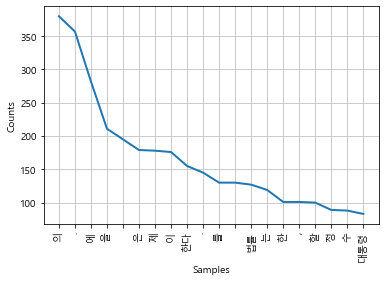

In [17]:
# 상위 빈도 단어들의 빈도를 그래프로 출력
%matplotlib inline
c_nltk_text.plot(20)

+ 의미 없는 단어나 특수문자가 많으므로 정제가 필요

In [18]:
tokens_new = [] # 리스트 생성
for token in tokens_c:
    if len(token.strip()) > 1: # 스페이스를 제외한 나머지 문자열의 길이가 둘 이상인 단어만 포함
        tokens_new.append(token.strip()) # 추출한 단어들 tokens_new 리스트에 추가
print(len(tokens_new))

4520


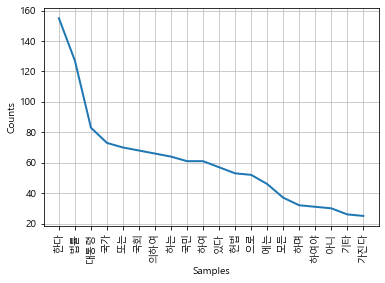

In [20]:
# 수정한 리스트를 바탕으로 그래프 다시 그리기
c_nltk_text = nltk.Text(tokens_new, name = "대한민국헌법")
c_nltk_text.plot(20)

+ 특정 단어 빈도 구하기: `c_nltk_text.count()`

In [22]:
# "대한민국"의 빈도 구하기
c_nltk_text.count('대한민국')

11

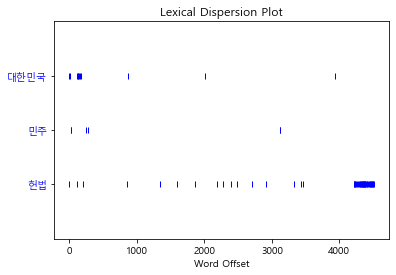

In [23]:
# 단어들 중 주어진 단어들의 위치를 표시
c_nltk_text.dispersion_plot(['대한민국', '민주', '헌법'])

+ 명사만 추출해서 처리하기

In [46]:
nc = okt.nouns(c) # 데이터에서 명사만 추출
print(len(nc))
print(" ".join(nc[:50]))

3882
대한민국 헌법 유구 역사 전통 우리 국민 운동 건립 대한민국 임시정부 법 통과 불의 항거 민주 이념 계승 조국 민주 개혁 평화 통일 사명 입 각하 정의 인도 동포 애 로써 민족 단결 공고 모든 사회 폐습 불의 타파 자율 조화 바탕 자유민주 질서 더욱 정치 경제 사회 문화 모든


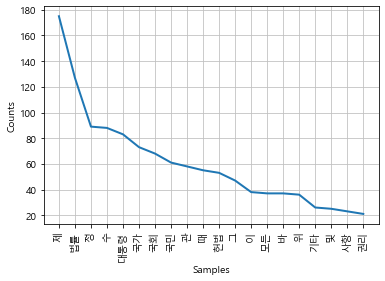

In [26]:
ncnt = nltk.Text(nc, name = "Okt명사")
ncnt.plot(20)

### 5.2. Wordcloud(영어) - 소설 엠마

+ 영어 wordcloud를 그리기 위해 gutenberg.org 사이트에서 제공하는 "austen-emma.txt" 데이터 사용

In [30]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg   # nltk.corpus의 서브패키지 사용
files_en = gutenberg.fileids() # 파일 목록
doc_en = gutenberg.open('austen-emma.txt').read() # 원하는 데이터 불러오기

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


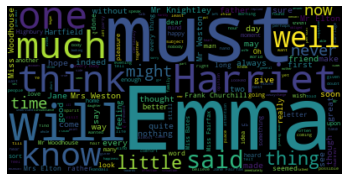

In [31]:
from wordcloud import WordCloud

# 워드클라우드 이미지 생성
wordcloud = WordCloud().generate(doc_en)

# matplotlib 패키지 이용해서 생성한 워드클라우드(이미지) 출력
import matplotlib.pyplot as plt
%matplotlib inline

# plt.imshow: 이미지 출력 함수
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

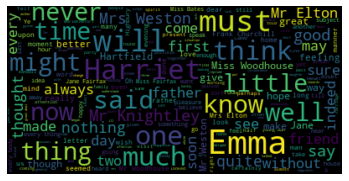

In [32]:
# 최대 폰트 크기 줄이고 다시 출력
wordcloud = WordCloud(max_font_size=40).generate(doc_en)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 5.3. wordcloud(한글) - 한글 기사

+ 한글 wordcloud를 그리기 위해 다음 뉴스 사이트 분석
+ 한글 wordcloud는 그냥 그리면 폰트가 깨지므로 한글 폰트 지정해줘야 함
> test 예제 파일: https://eclass2.ajou.ac.kr/bbcswebdav/pid-647046-dt-content-rid-9069852_1/courses/2020U00020032020084481/test2.txt

+ 분석 전 test 파일로 점검

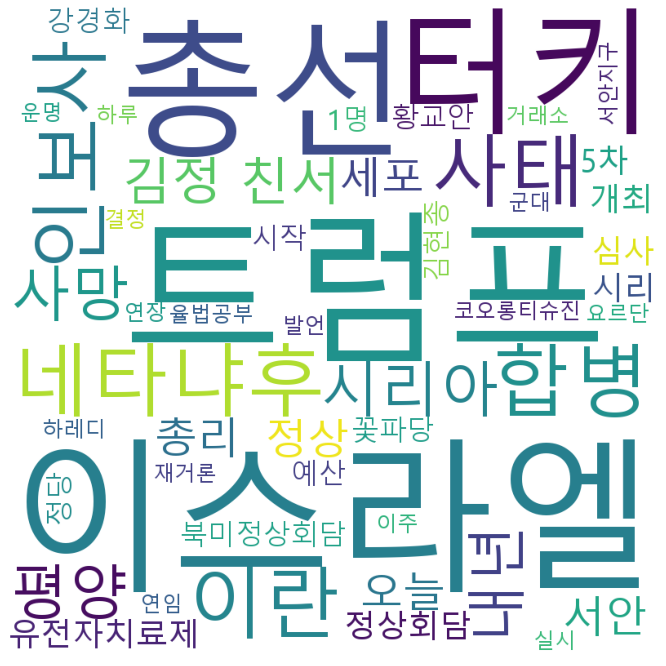

In [37]:
# text 파일로부터 읽어들여 워드클라우드 그리기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
font_path = 'c:/Windows/Fonts/malgun.ttf' # 한글 폰트의 위치를 지정

# 폰트 및 다른 속성들을 지정
wordcloud = WordCloud( 
    font_path = font_path,
    width = 800,
    height = 800, 
    max_words=50,
    background_color='white' # 영어와 달리 배경을 흰색으로
)

text=open('test2.txt').read() # 텍스트 파일을 읽음
wordcloud = wordcloud.generate(text) # 워드 클라우드 생성
 
fig = plt.figure(figsize=(12,12)) # 그림판 크기를 지정
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

+ 다음 뉴스 기사 분석

<Figure size 432x288 with 0 Axes>

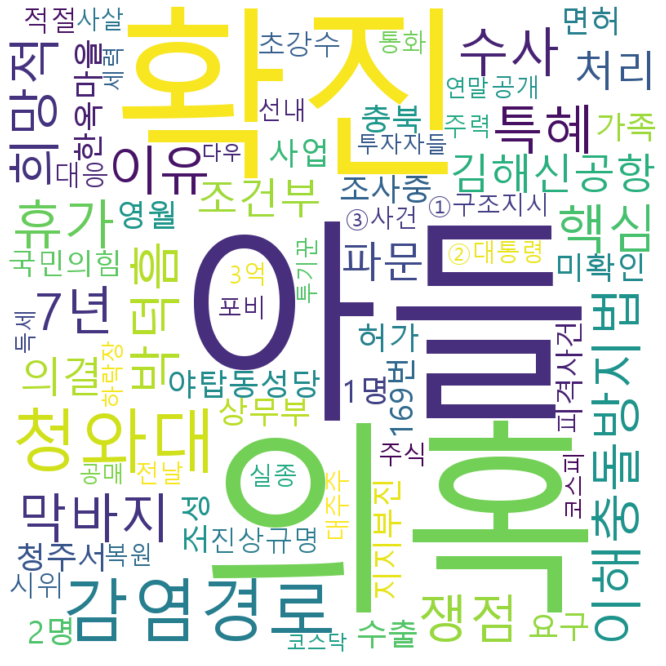

In [38]:
## 다음 뉴스에서 한글 기사 읽어오기
from collections import Counter
import random
import webbrowser

from konlpy.tag import Hannanum
import sys
from bs4 import BeautifulSoup
import urllib.request as req

# 사이트 url 불러와서 html 분석
def get_bill_text_daum():
    url1 = "https://news.daum.net/"
    res = req.urlopen(url1)
    soup = BeautifulSoup(res, "html.parser")
    
# selector 이용해서 원하는 부분 추출
    text2=soup.select("strong.tit_g > a.link_txt")
    kk=[a.string for a in text2]
    corpus = ''
    for text in kk:
        text = text.replace('\r','').replace('\n','').replace('\t','')
        corpus = corpus + ' ' +text
     
    return corpus

def get_tags(text, ntags=50, multiplier=10):
    h = Hannanum()
    nouns = h.nouns(text)
    count = Counter(nouns)
    return(nouns)
   
text = get_bill_text_daum()
tags = get_tags(text)
# print(tags)
# print(" ".join(tags))

## 워드클라우드 그리기

# 폰트 및 다른 속성들을 지정
wordcloud = WordCloud( 
    font_path = font_path,
    width = 800,
    height = 800, 
   # max_words=50,
    background_color='white' # 배경을 흰색으로
)

wordcloud = wordcloud.generate(" ".join(tags)) # 위에서 만든 태그를 이용하여 워드클라우드 생성
 
fig = plt.figure()
fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear") # 글자의 테두리를 매끄럽게
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png') # 이미지 파일로 저장

+ 동일한 데이터에 대하여 nltk를 이용해 빈도 그래프 그리기

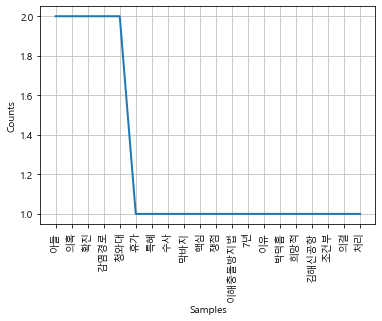

In [39]:
new_tags = []
for token in tags:
    if len(token.strip()) > 1: # 스페이스를 제외한 나머지 문자열의 길이가 둘 이상인 단어만 포함
        new_tags.append(token.strip())

cnt = nltk.Text(new_tags, name = "다음기사수집")
cnt.plot(20)

+ 외부 csv파일에서 데이터를 읽어와 필요한 부분에 대해서만 word cloud 그리기

In [40]:
import pandas as pd
df = pd.read_csv('movie_data.csv', header=None, names=['review', 'rate', 'name'])
df.columns.tolist()
#".".join(df.review.tolist())

['review', 'rate', 'name']

In [41]:
# 파일의 내용 미리보기 (상위 5개)
df.head()

,review,rate,name
0,오~~ 종합선물셋트,9,인피니티 워
1,크레딧 올라올때부터 충격먹었어요 ㅋㅋㅋㅋ 나중에 더큰 활약기대하겠습니다! 와칸다포에...,10,인피니티 워
2,이제 남은건타노스 밖에,10,인피니티 워
3,타노스는 발암물질이다.,9,인피니티 워
4,정말재미있게봤습니다,10,인피니티 워


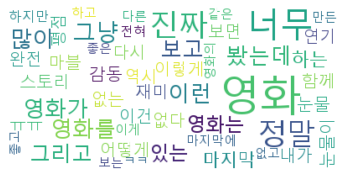

In [42]:
# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 50,
    #width = 800,
    #height = 800, 
    background_color='white',
    max_words=50
)

wordcloud = wordcloud.generate(" ".join(df.review.tolist())) # review column의 내용을 가져와서 word cloud 그리기
 
fig = plt.figure()
#fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png')

## 6. 문맥 파악하기

+ nltk 패키지 이용, 헌법 데이터 이용
+ `concordance()`: 주어진 단어를 중심으로 앞 뒤의 단어들을 보여 줌

In [43]:
c_nltk_text.concordance('헌법')

Displaying 25 of 53 matches:
대한민국 헌법 유구 역사 전통 빛나는 우리 국민 운동 으로 건립 대한민국 임시정부
원히 확보 다짐 하면서 1948년 7월 12일 제정 되고 걸쳐 개정 헌법 이제 국회 의결 거쳐 국민투표 의하여 개정 한다 1조 대한민국 민주
방위 신성한 의무 수행 사명 으로 하며 정치 중립성 준수 된다 6조 헌법 의하여 체결 공포 조약 일반 으로 승인 국제 법규 국내법 같은 효력
청원 권리 가진다 국가 청원 대하 심사 의무 진다 27조 모든 국민 헌법 법률 법관 의하여 법률 의한 재판 받을 권리 가진다 군인 또는 군무
한다 모든 국민 보건 하여 국가 보호 받는다 37조 국민 자유 권리 헌법 열거 되지 아니한 이유 경시 되지 아니 한다 국민 모든 자유 권리 
시 하여야 한다 48조 국회 의장 인과 부의 선출 한다 49조 국회 헌법 또는 법률 특별한 규정 없는 재적 의원 과반수 출석 출석 의원 과반
 에서 예산안 의결 까지 다음 목적 경비 년도 예산 하여 집행 있다 헌법 이나 법률 의하여 설치 기관 또는 시설 유지 운영 법률상 지출 의무
위원회 위원 감사원장 감사 위원 기타 법률 공무원 직무 집행 있어서 헌법 이나 법률 배한 에는 국회 탄핵 의결 있다 항의 탄핵 국회 재적 의
 대하 국가 대표 한다 대통령 국가 독립 영토 보전 국가 계속 성과 헌법 수호 책무 진다 대통령 조국 평화 통일 성실한 의무 진다 행정권 대
이내 후임 선거 한다 69조 대통령 취임 즈음 하여 다음 선서 한다 헌법 준수 하고 국가 보위 하며 조국 평화 통일 국민 자유 복리 증진 민
교사절 신임 접수 또는 파견 하며 선전포고 강화 한다 74조 대통령 헌법 법률 하는 의하여 국군 통수 한다 국군 조직 편성 법률 한다 75조
 계엄 해제 요구 에는 대통령 이를 해제 하여야 한다 78조 대통령 헌법 법률 하는 의하여 공무원 임면한 79조 대통령 법률 하는 의하여 사
 한다 국정 계획 정부 일반 정책 선전 강화 기타 중요한 대외 정책 헌법 개정안 국민투표 조약 법률 

+ `similar()`: 주어진 단어와 비슷한 context에서 사용된 단어들을 반환

In [44]:
c_nltk_text.similar('헌법')

의하여 공포 행위 공공필요 국무총리 자격 정년


+ `collocations()`: 동일 맥락에서 높은 빈도로 나타나는 어휘의 쌍 찾기

In [45]:
nltk.download('stopwords')
# 함께 많이 나타난 단어들을 출력
c_nltk_text.collocations()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


의하지 아니하고는; 국무총리 국무위원; 그러하지 아니하다; 단결권 단체교섭권; 헌법재판소 재판관; 단체교섭권 단체행동권;
인하여 불이익; 대법원 대법관; 단체행동권 가진다; 비밀선거 의하여; 대통령 국무총리; 국무위원 행정각부; 의하여 공무원


[nltk_data]   Unzipping corpora\stopwords.zip.
